# CME538 Big Project - Data Hustlers

In [1]:
# Import 3rd party libraries
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import seaborn as sns

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install folium

In [3]:
import folium

## Import Weather Data

In [4]:
weather_files = os.listdir()
weather_filenames = [file for file in weather_files if 'P1D' in file]

# Print file names
print(weather_filenames[0:5])

['en_climate_daily_ON_6158355_2018_P1D.csv', 'en_climate_daily_ON_6158355_2019_P1D.csv', 'en_climate_daily_ON_6158355_2020_P1D.csv', 'en_climate_daily_ON_6158355_2021_P1D.csv', 'en_climate_daily_ON_6158355_2017_P1D.csv']


In [6]:
weather_data = []

for file in weather_filenames:
    data = pd.read_csv(file)
    weather_data.append(data)
    
weather_data = pd.concat(weather_data)

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2018-01-01,2018,1,1,NaN,-7.9,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2018-01-02,2018,1,2,NaN,-7.1,...,NaN,M,0.0,NaN,9.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2018-01-03,2018,1,3,NaN,-5.3,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2018-01-04,2018,1,4,NaN,-7.7,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2018-01-05,2018,1,5,NaN,-14.7,...,NaN,M,0.0,NaN,10.0,NaN,NaN,M,NaN,M


In [7]:
# Converting to Date/Time Index
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'])
weather_data.set_index(pd.DatetimeIndex(weather_data['Date/Time']), inplace=True)

weather_data.drop(columns=['Date/Time'], inplace=True)

weather_data.index = weather_data.index.tz_localize('EST')

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2018,1,1,NaN,-7.9,NaN,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
2018-01-02 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2018,1,2,NaN,-7.1,NaN,...,NaN,M,0.0,NaN,9.0,NaN,NaN,M,NaN,M
2018-01-03 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2018,1,3,NaN,-5.3,NaN,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
2018-01-04 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2018,1,4,NaN,-7.7,NaN,...,NaN,M,0.2,NaN,11.0,NaN,NaN,M,NaN,M
2018-01-05 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2018,1,5,NaN,-14.7,NaN,...,NaN,M,0.0,NaN,10.0,NaN,NaN,M,NaN,M


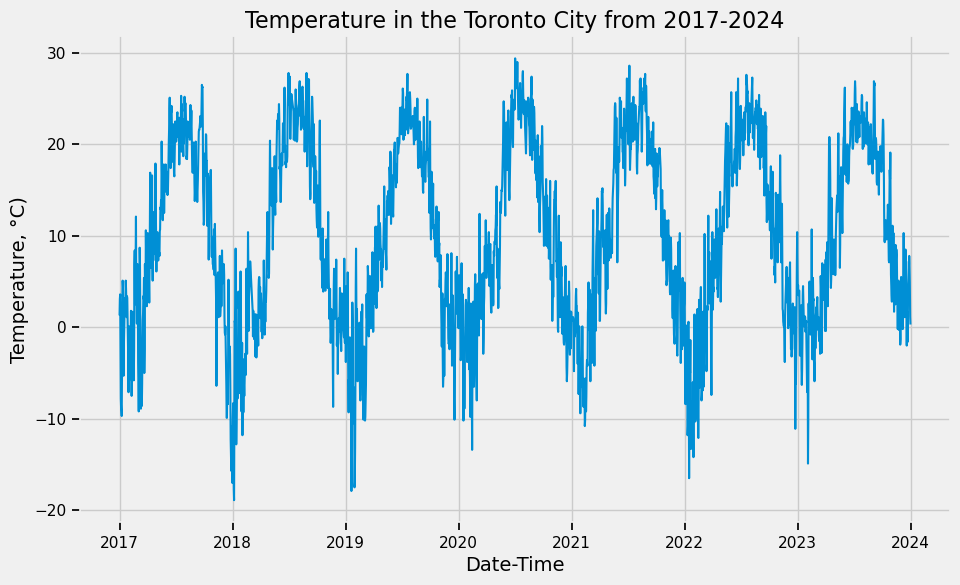

In [8]:
# Plotting Weather Data to Explore Trends
plt.figure(figsize=(10, 6))

sns.lineplot(data=weather_data, x=weather_data.index, y='Mean Temp (°C)')

plt.title('Temperature in the Toronto City from 2017-2024', fontsize=16)
plt.xlabel('Date-Time', fontsize=14)
plt.ylabel('Temperature, °C)', fontsize=14)

# Show the plot
plt.show()

In [10]:
# Add a 'season' column for seasonality analysis
def assign_season(row):
    if row['Month'] in [12, 1, 2]:
        return 'Winter'
    elif row['Month'] in [3, 4, 5]:
        return 'Spring'
    elif row['Month'] in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

weather_data['Season'] = weather_data.apply(assign_season, axis=1)

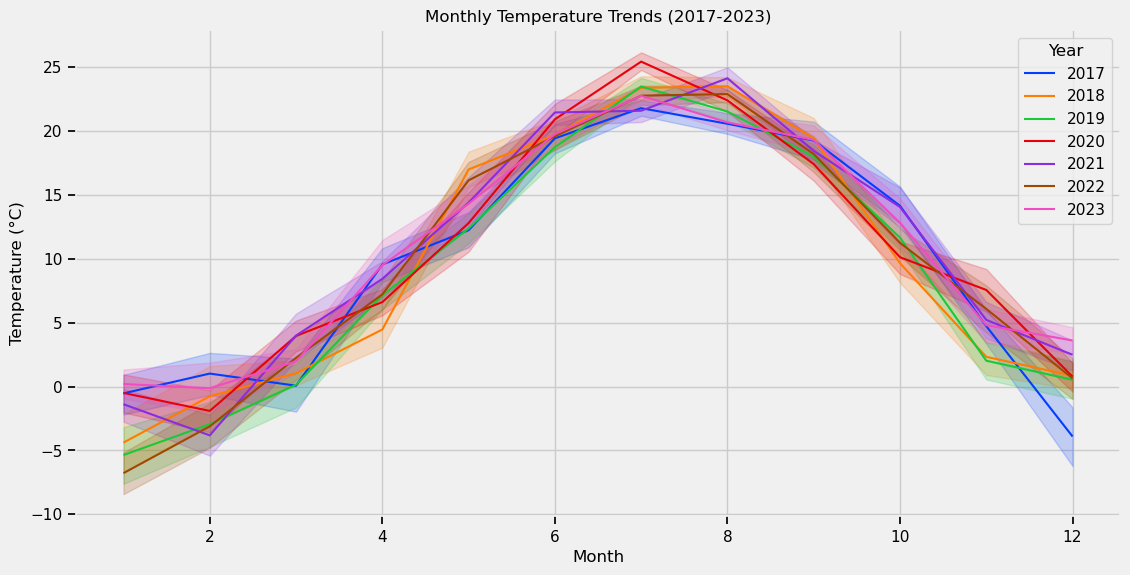

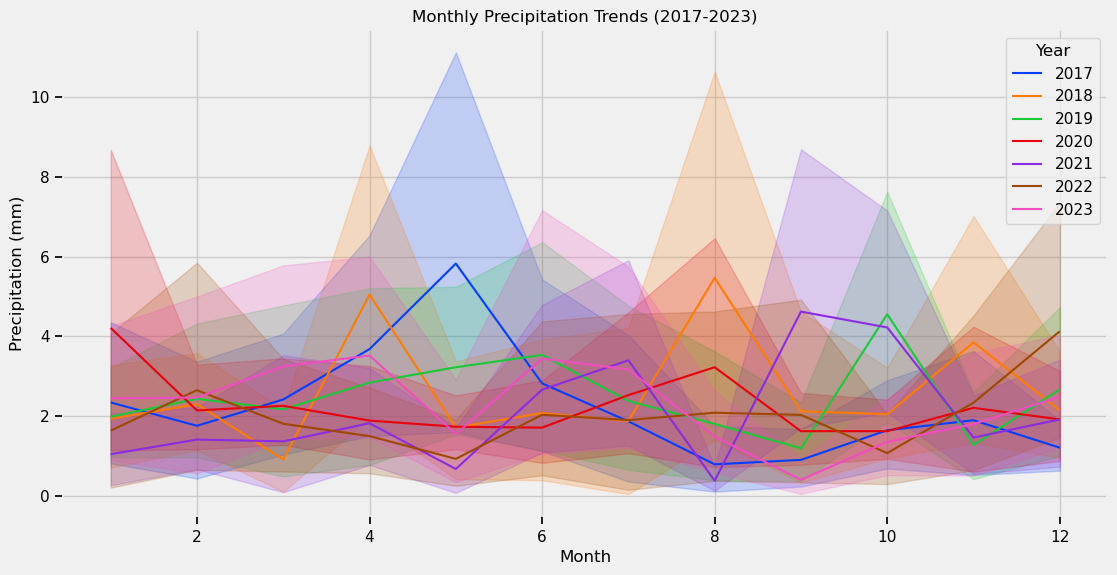

In [15]:
# 1. Time Series Plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_data, x='Month', y='Mean Temp (°C)', hue='Year', palette='bright')
plt.title('Monthly Temperature Trends (2017-2023)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_data, x='Month', y='Total Precip (mm)', hue='Year', palette='bright')
plt.title('Monthly Precipitation Trends (2017-2023)')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.show()

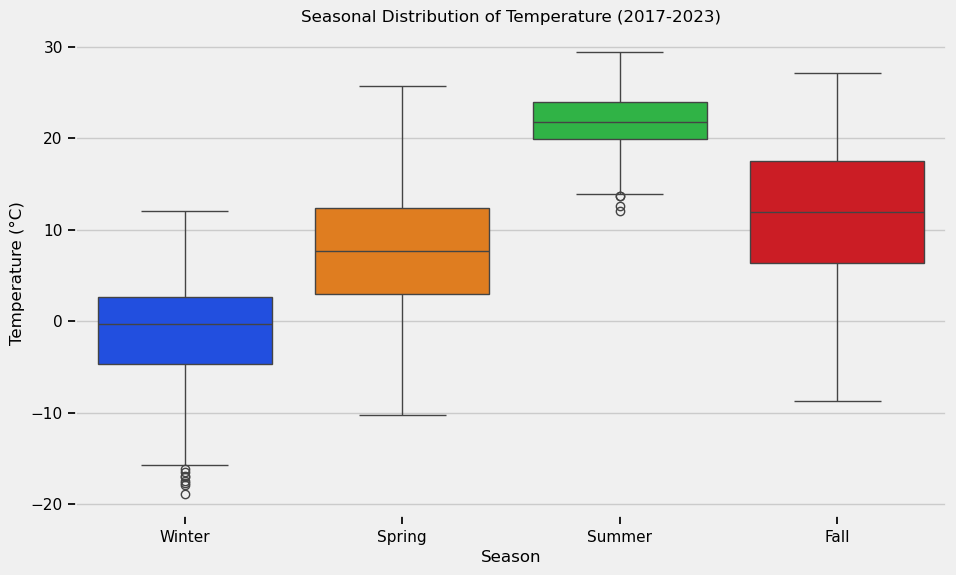

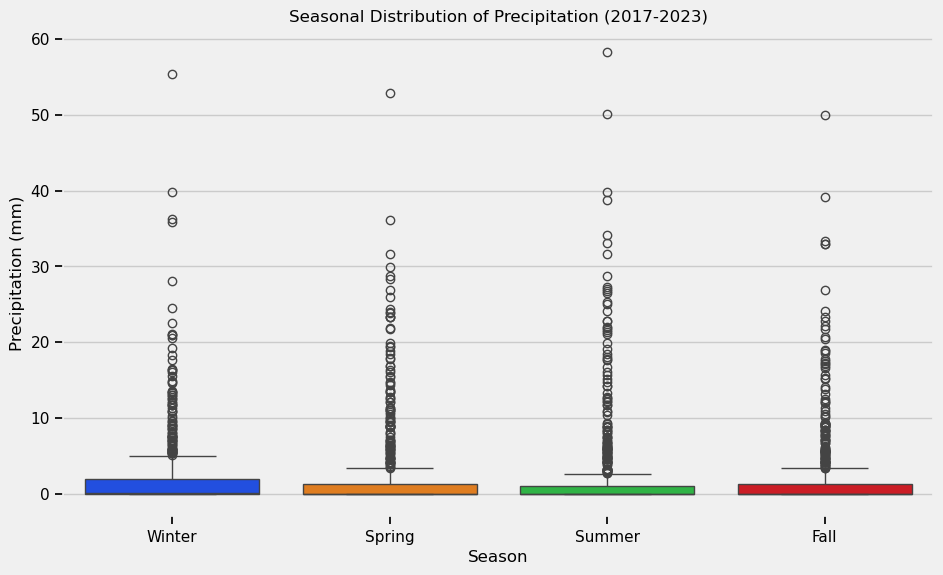

In [17]:
# 2. Seasonal Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_data, x='Season', y='Mean Temp (°C)', palette='bright')
plt.title('Seasonal Distribution of Temperature (2017-2023)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Season')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_data, x='Season', y='Total Precip (mm)', palette='bright')
plt.title('Seasonal Distribution of Precipitation (2017-2023)')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Season')
plt.show()